# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver e inclua o parâmetro decimal ',' para o pandas identificar os números corretamente

In [2]:
import pandas as pd

cadastrofunc = pd.read_csv('CadastroFuncionarios.csv',delimiter=';', decimal=',', encoding='utf-8')
cadastrocliente = pd.read_csv('CadastroClientes.csv',delimiter=';', decimal=',', encoding='utf-8')
servicosprestados = pd.read_excel('BaseServiçosPrestados.xlsx')


TabelaConsolidada = servicosprestados
TabelaConsolidada = TabelaConsolidada.merge(cadastrofunc,on='ID Funcionário')
TabelaConsolidada = TabelaConsolidada.merge(cadastrocliente,on='ID Cliente')

# para excluir coluna você usa drop cadastrocliente = cadastrocliente.drop(['Estado Civil], axis=1) 1 é para coluna e 0 para linha

display(TabelaConsolidada)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Cliente,Valor Contrato Mensal
0,OS0001,67,1,14,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,Teixeira Gonçalves,540
1,OS0058,67,78,6,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,Eduardo Resende,1710
2,OS0092,67,125,8,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,De Machado,1710
3,OS0128,67,175,6,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,Vilhena Rossini,945
4,OS0002,17,2,12,S,Pedro Carrera,15718,7859.0,3143.6,176,628.32,Coordenador,Logística,Souza Santos,1260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,OS0224,25,304,14,S,Livia Mello,23612,11806.0,4722.4,264,561.12,Diretor,Administrativo,Da Oliveira,810
233,OS0228,79,308,10,S,Larissa Coutinho Beltrao,17207,8603.5,3441.4,198,688.80,Diretor,Operações,Manoel Rimes,1935
234,OS0229,99,309,8,C,Rafael Viana Santos,18763,9381.5,3752.6,154,692.16,Coordenador,Administrativo,Arlindo Amorim,3735
235,OS0230,14,310,12,C,Jessica Oliveira Lima,2182,1091.0,436.4,220,604.80,Estagiário,Financeiro,Kenji Espinha,3735


1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    

In [3]:


cadastrofunc['Salario Total'] = cadastrofunc['Salario Base'] + cadastrofunc['Impostos'] + cadastrofunc['Beneficios'] + cadastrofunc['VT'] + cadastrofunc['VR']


display(cadastrofunc)
print('O Custo com Salarios na empresa foi de R$: {:,} \n Abaixo Tabela por Cargo'.format(cadastrofunc['Salario Total'].sum()))

custocargo = cadastrofunc[['Cargo','Area','Salario Total']]
custocargo = custocargo.groupby(['Area','Cargo']).sum('Salario Total')

display(custocargo)


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Salario Total
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,38208.04
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9915.36
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,28195.32
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36962.66
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística,19104.18
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial,7875.92
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo,42616.32
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial,9605.88


O Custo com Salarios na empresa foi de R$: 2,717,493.22 
 Abaixo Tabela por Cargo


Salario Total
Area           Cargo                     
Administrativo Analista         241436.76
               Coordenador      202131.18
               Diretor           75952.84
               Estagiário       158582.76
               Gerente            7912.84
Comercial      Analista         238171.18
               Coordenador      114363.52
               Estagiário       118638.32
               Gerente           52931.84
Financeiro     Analista          99341.74
               Coordenador       44932.26
               Diretor          107290.42
               Estagiário        59135.54
               Gerente           26146.38
Logística      Analista         281203.12
               Coordenador      106588.52
               Estagiário       109552.06
               Gerente           66396.72
Operações      Analista          96237.14
               Coordenador      125644.92
               Diretor           91563.14
               Estagiário       269313.54
               Gerente           24026.48

2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [4]:
df_servicos = servicosprestados.drop(['Codigo do Servico','ID Funcionário'], axis=1)

df_faturamento = cadastrocliente
df_faturamento = df_faturamento.merge(df_servicos, on='ID Cliente')
df_faturamento['Faturamento Total'] = df_faturamento['Valor Contrato Mensal'] * df_faturamento['Tempo Total de Contrato (Meses)'] 

display(df_faturamento)

faturamento = df_faturamento['Faturamento Total'].sum()

print('O faturamento total da empresa foi de R$: {:,}'.format(faturamento))

,ID Cliente,Cliente,Valor Contrato Mensal,Tempo Total de Contrato (Meses),Faturamento Total
0,1,Teixeira Gonçalves,540,14,7560
1,2,Souza Santos,1260,12,15120
2,4,Santos Costa,2520,14,35280
3,5,Do Monteiro,3510,8,28080
4,6,Soares Lobo,2340,8,18720
...,...,...,...,...,...
232,315,Americo Bomfim,1575,4,6300
233,316,Manoel Costa,3690,8,29520
234,317,Gomes Machado,2385,6,14310
235,319,Pereira Fazenda,4185,14,58590


O faturamento total da empresa foi de R$: 5,519,160


    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    

In [5]:


df_func_contratos = cadastrofunc[['ID Funcionário', 'Nome Completo']].merge(servicosprestados[['ID Funcionário', 'ID Cliente']],on='ID Funcionário')



qtde_funcionarios = len(cadastrofunc['ID Funcionário'])
qtde_vendas_func = len(servicosprestados['ID Funcionário'].unique())

print('O Percentual de funcionarios que realizaram vendas é de {:.2%}, que totalizam {} funcionarios sem vendas'.format(qtde_vendas_func/qtde_funcionarios, qtde_funcionarios - qtde_vendas_func))

O Percentual de funcionarios que realizaram vendas é de 86.84%, que totalizam 15 funcionarios sem vendas


4. Calcule o total de contratos que cada área da empresa já fechou

In [6]:


df_areacontrato = servicosprestados[['ID Funcionário','Tempo Total de Contrato (Meses)']].merge(cadastrofunc[['Area','ID Funcionário']],on='ID Funcionário')

df_qtdearea =  df_areacontrato['Area'].value_counts()

display(df_qtdearea)




Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

5. Calcule o total de funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<AxesSubplot:>

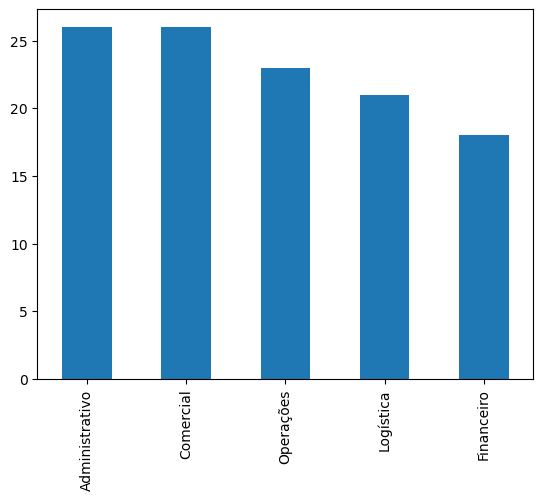

In [7]:


qtde_func_area = cadastrofunc['Area'].value_counts()

display(qtde_func_area)


qtde_func_area.plot(kind='bar')



6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver e inclua o parâmetro decimal ',' para o pandas identificar os números corretamente

In [13]:
mediofaturamento = cadastrocliente['Valor Contrato Mensal'].mean()

print('O faturamento médio é de R$: {:,}'.format(mediofaturamento))

O faturamento médio é de R$: 2,502.5625
